In [2]:
import sys
import scipy as sy
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib as plt
import sklearn as sk
import seaborn as sns

In [3]:
data = pd.read_csv('../creditcard.csv')

In [3]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(data.shape)

(284807, 31)


In [5]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
Fraud = data[data['Class']==1]

Normal = data[data['Class']==0]

In [9]:
print ("Fraud")
print (Fraud.Time.describe())
print ()
print ("Normal")
print (Normal.Time.describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


## Historgram

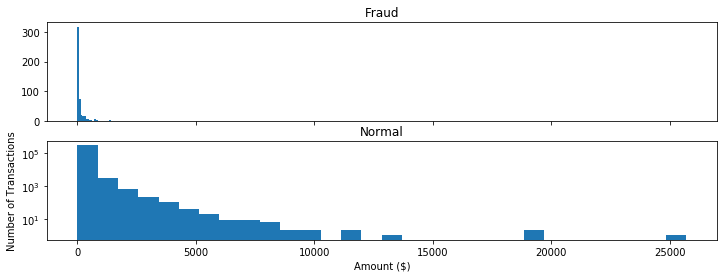

In [10]:
f, (ax1, ax2) = plt.pyplot.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.pyplot.xlabel('Amount ($)')
plt.pyplot.ylabel('Number of Transactions')
plt.pyplot.yscale('Log')
plt.pyplot.show()

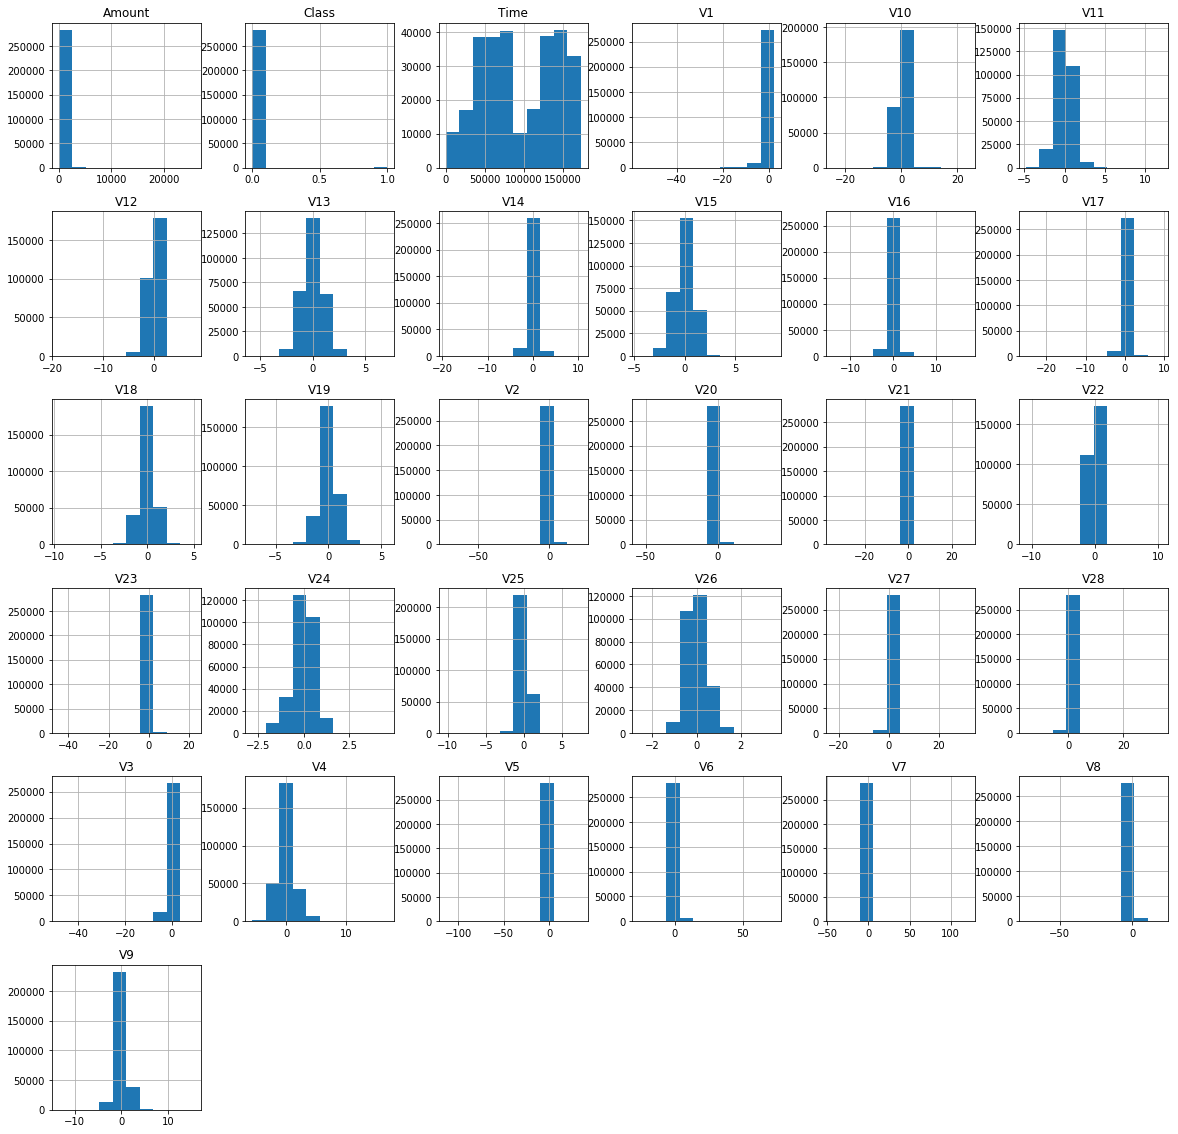

In [11]:
data.hist(figsize=(20,20))
plt.pyplot.show()

## Correlation Matrix

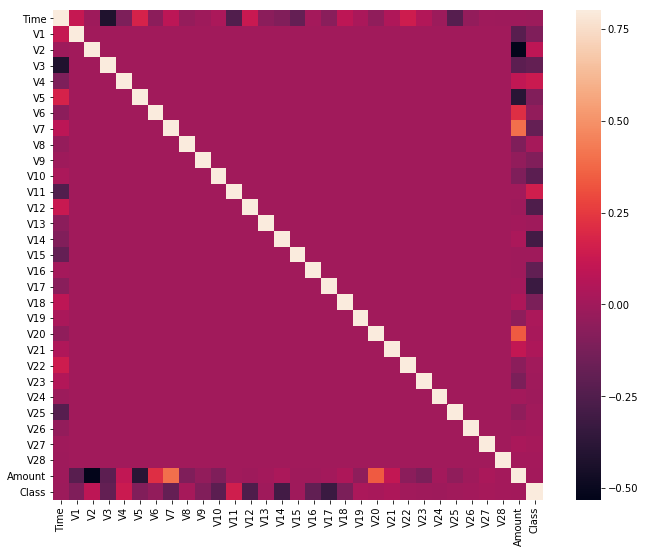

In [12]:
correlation_matrix = data.corr()

fig = plt.pyplot.figure(figsize=(12,9))

sns.heatmap(correlation_matrix,vmax=0.8,square = True)

plt.pyplot.show()

## Training Set Vs Testing Set

In [8]:
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]

X = columns
Y = 'Class'

fraud_train = Fraud.sample(frac=0.8)
fraud_train = pd.concat([fraud_train, Normal.sample(frac = 0.8)], axis = 0)


# X_test contains all the transaction not in X_train.
fraud_test = data.loc[~data.index.isin(fraud_train.index)]

In [13]:
fraud_train_x = fraud_train.drop(labels = Y, axis = 1)
fraud_train_y = fraud_train.drop(labels = X, axis = 1)

                                
fraud_test_x = fraud_test.drop(labels = Y, axis = 1)
fraud_test_y = fraud_test.drop(labels = X, axis = 1)

## Getting start with Machine Learning

### Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import classification_report, accuracy_score

In [14]:
fraud_train_y = fraud_train_y['Class'].values
fraud_test_y = fraud_test_y['Class'].values

solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},  default: ‘liblinear’.  
<br />
<br />
Algorithm to use in the optimization problem. 
<br />
<br />
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones. 
<br />
<br />
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
<br />
<br />
‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.

In [15]:
model_1 = lr(solver='lbfgs').fit(fraud_train_x, fraud_train_y)

In [16]:
pred_y_1 = model_1.predict(fraud_test_x)

In [17]:
print("classification report")
print("")
print (classification_report(fraud_test_y, pred_y_1))

print ("")
print ("Accuracy Score: ", accuracy_score(fraud_test_y, pred_y_1))

classification report

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56863
          1       0.71      0.61      0.66        98

avg / total       1.00      1.00      1.00     56961


Accuracy Score:  0.9988939800916417


In [18]:
from sklearn.metrics import confusion_matrix

In [26]:
# confusion matrix in an array

confusion_matrix(fraud_test_y, pred_y_1)

array([[56838,    25],
       [   38,    60]])

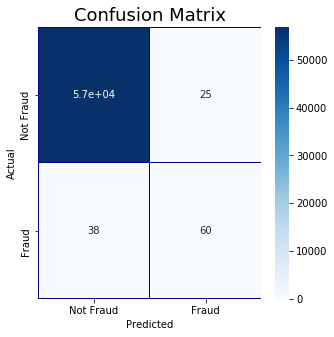

In [28]:
# graph out your confusion matrix

cm = pd.crosstab(fraud_test_y, pred_y_1, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.pyplot.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.pyplot.title('Confusion Matrix', fontsize=18)
plt.pyplot.show()